# Análise Exploratória

### 1. Tema: Análise dos impactos relacionados à distribuição de profissionais da área de saúde para atuarem em casos de COVID 19
O presente projeto visa realizar uma análise exploratória dos dados considerando a distribuição do número de profissionais de saúde (médicos, enfermeiros, fisioterapeutas) por município e sua correlação com a demanda (número de casos que demandaram internação) e eventual impacto em relação ao número de óbitos por COVID-19. Pretende-se detectar se a capacidade da região em relação ao número de profissionais na área de saúde impactou nos casos de óbitos por COVID-19 e verificar se há uma possível “distribuição adequada” da quantidade de profissionais de saúde por habitante que evidencie um melhor atendimento aos pacientes.


### 2. Equipe:
<ul> 
<li>David Lourenço da Costa, 233657, DavidLCostaBR, davidlcosta67@gmail.com, Pós-Graduação Ciência da Computação, UNICAMP.</li>
<li>Leidmar Magnus Festa, 1525280, leidmar, festa@alunos.utfpr.edu.br, Msc Computação Aplicada, UTFPR.</li>
<li>Vinicius Araujo, 157500, ViniciusArj, v157500@dac.unicamp.br, Pós-Graduação Geologia, UNICAMP.</li>
</ul>


### 3. Obtenção e processamento de dados:
A etapa de obtenção de dados foi dividida em quatro etapas distintas, porém conexas: obtenção do número de médicos, enfermeiros e fisioterapeutas por cidade, obtenção de leitos em Unidades de Terapia Intensiva (UTI), obtenção do número respiradores por município e número de óbitos por município.

#### 3.1 Obtenção do número de médicos, enfermeiros e fisioterapeutas
Os dados do número de médicos por município foram obtidos a partir da ferramenta denominada de “mapas interativos” criada pelo IBGE (“https://mapasinterativos.ibge.gov.br/covid/saude/”). O arquivo apresenta a quantidade de profissionais médicos tanto no SUS como em hospitais privados em dezembro de 2019 para cada município brasileiro, de acordo com o Cadastro Nacional de Estabelecimento de Saúde (CNES). Os dados supracitados foram processados no Python e apresentam as informações conforme segue(Out[1]).

#### 3.1.1 DataSets básicos:
Utilizando os *datasets* anteriormente indicados, temos as informações básicas sobre o número de médicos e enfermeiros separados por municípios e UF. Atenção para os separadores dos arquivos **".csv"** do site *mapas interativos*, pois o separador de colunas é o ";", desta forma ao importar devemos alterar o delimitardor padrão.

#### 3.1.1.1 Quantidade de médicos em cada UF

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



#abrindo os dataSets com delimitador ";"
dfMedMun = pd.read_csv('./data/mapasInterativos/medicosPorMunicipios.csv', delimiter=";")
dfMedUf = pd.read_csv('./data/mapasInterativos/medicosPorUf.csv', delimiter=";")
dfLeitos = pd.read_csv('./data/mapasInterativos/Leitos_de_UTI_em_2019.csv')
#definindo os indexes:
dfMedUf = dfMedUf.set_index('Código do Estado ou Distrito Federal')
dfMedMun = dfMedMun.set_index('Código do Município')
dfLeitos = dfLeitos.set_index('Código_do_Município')

dfMedUf

Estado ou Distrito Federal  \
Código do Estado ou Distrito Federal                              
28                                                      SERGIPE   
21                                                     MARANHÃO   
32                                               ESPÍRITO SANTO   
13                                                     AMAZONAS   
14                                                      RORAIMA   
52                                                        GOIÁS   
16                                                        AMAPÁ   
43                                            RIO GRANDE DO SUL   
25                                                      PARAÍBA   
22                                                        PIAUÍ   
35                                                    SÃO PAULO   
42                                               SANTA CATARINA   
26                                                   PERNAMBUCO   
33                                               RIO DE JANEIRO   
50                                           MATO GROSSO DO SUL   
51                                                  MATO GROSSO   
29                                                        BAHIA   
31                                                 MINAS GERAIS   
27                                                      ALAGOAS   
23                                                        CEARÁ   
24                                          RIO GRANDE DO NORTE   
41                                                       PARANÁ   
11                                                     RONDÔNIA   
53                                             DISTRITO FEDERAL   
12                                                         ACRE   
15                                                         PARÁ   
17                                                    TOCANTINS   

                                      População Total Estimada (2019)  \
Código do Estado ou Distrito Federal                                    
28                                                            2298696   
21                                                            7075181   
32                                                            4018650   
13                                                            4144597   
14                                                             605761   
52                                                            7018354   
16                                                             845731   
43                                                           11377239   
25                                                            4018127   
22                                                            3273227   
35                                                           45919049   
42                                                            7164788   
26                                                            9557071   
33                                                           17264943   
50                                                            2778986   
51                                                            3484466   
29                                                           14873064   
31                                                           21168791   
27                                                            3337357   
23                                                            9132078   
24                                                            3506853   
41                                                           11433957   
11                                                            1777225   
53                                                            3015268   
12                                                             881935   
15                                                            8602865   
17                                               

O gráfico abaixo ilustra a quantidade de médicos em cada UF informada no dataset anterior:

<IPython.core.display.Javascript object>


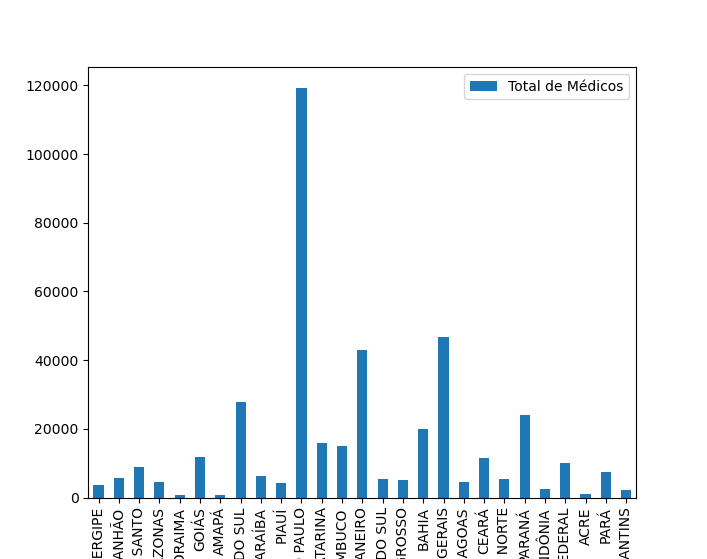

In [115]:
barrasUf = dfMedUf.plot.bar(x='Estado ou Distrito Federal', y='Total de Médicos')

O dataset abaixo ( Out[4] ) mostra a quantidade de médicos no SUS, existentes em cada município brasileiro:

In [5]:
#renomeando nomes das colunas para facilitar
dfMedMun = dfMedMun.rename(columns={'Nome do Município': 'NomeDoMunicipio','Região': 'Regiao', 'População Total Estimada (2019)': 'PopulTotEstim2019', 'Total de Médicos': 'TotalMedicos'}) 
dfMedMun


NomeDoMunicipio          Estado        Regiao  \
Código do Município                                                      
5200050                  Abadia de Goiás           Goiás  Centro-Oeste   
3100104              Abadia dos Dourados    Minas Gerais       Sudeste   
5200100                        Abadiânia           Goiás  Centro-Oeste   
3100203                           Abaeté    Minas Gerais       Sudeste   
1500107                       Abaetetuba            Pará         Norte   
...                                  ...             ...           ...   
4206405                       Guaraciaba  Santa Catarina           Sul   
2305001              Guaraciaba do Norte           Ceará      Nordeste   
3128253                       Guaraciama    Minas Gerais       Sudeste   
1709302                           Guaraí       Tocantins         Norte   
5209291                         Guaraíta           Goiás  Centro-Oeste   

                     PopulTotEstim2019  TotalMedicos  Total de Médicos no SUS  \
Código do Município                                                             
5200050                           8773            16                       16   
3100104                           6989            14                       14   
5200100                          20042            16                       16   
3100203                          23237            51                       48   
1500107                         157698            90                       82   
...                                ...           ...                      ...   
4206405                          10090            12                        9   
2305001                          40642            16                       15   
3128253                           4972             2                        2   
1709302                          25923            28                       26   
5209291                           1996             2                        2   

                     Médicos no SUS a cada 100mil hab  \
Código do Município                                     
5200050                                    182.377750   
3100104                                    200.314780   
5200100                                     79.832352   
3100203                                    206.567113   
1500107                                     51.998123   
...                                               ...   
4206405                                     89.197225   
2305001                                     36.907632   
3128253                                     40.225261   
1709302                                    100.297034   
5209291                                    100.200401   

                     Médicos a cada 100mil hab  Percentual de médicos no SUS  
Código do Município                                                           
5200050                             182.377750                    100.000000  
3100104                             200.314780                    100.000000  
5200100                              79.832352                    100.000000  
3100203                             219.477557                     94.117647  
1500107                              57.071111                     91.111111  
...                                        ...                           ...  
4206405                             118.929633                     75.000000  
2305001                              39.368141                     93.750000  
3128253                              40.225261                    100.000000  
1709302                             108.012190                     92.857143  
5209291                             100.200401                    100.000000  

[2000 rows x 9 columns]

In [157]:
#quantidade de médicos em cada região
dfMedMunNorte = dfMedMun[dfMedMun.Regiao == "Norte"]
dfMedMunSul = dfMedMun[dfMedMun.Regiao == "Sul"]
dfMedCentroOeste = dfMedMun[dfMedMun.Regiao == "Centro-Oeste"]
dfMedNordeste = dfMedMun[dfMedMun.Regiao == "Nordeste"]
dfMedSudeste = dfMedMun[dfMedMun.Regiao == "Sudeste"]
#histogram = dfMedMunSul.plot.hist(by='TotalMedicos', bins=10)

Em seguida, passamos a verificar se há dados faltantes e se o total de municípios brasileiros estava correto, ou seja, se há 5570 municípios. Após o pré-processamento dos dados, foi possível realizar uma análise exploratória prévia, buscando assim entender algumas características de interesse. 

### 3.2 Obtenção do número de leitos em UTIs

In [123]:
dfLeitosX1

X          Y  OBJECTID_1       Nome_Estado  \
Código_do_Município                                                       
1100023             -63.033808  -9.911964           2          Rondônia   
1100049             -61.451156 -11.435578           4          Rondônia   
1100122             -61.957458 -10.876817          12          Rondônia   
1100205             -63.909466  -8.766154          17          Rondônia   
1100304             -60.134778 -12.735126          22          Rondônia   
...                        ...        ...         ...               ...   
5218805             -50.908057 -17.785303        5521             Goiás   
5219308             -50.597169 -17.813692        5527             Goiás   
5220108             -50.371514 -16.523223        5541             Goiás   
5220454             -49.092786 -16.708350        5547             Goiás   
5300108             -47.908056 -15.784339        5570  Distrito Federal   

                               Nome_municipio  Pop_total  Leitos_UTI_Total_1  \
Código_do_Município                                                            
1100023                             Ariquemes     107863                  19   
1100049                                Cacoal      85359                  28   
1100122                             Ji-Paraná     128969                  10   
1100205                           Porto Velho     529544                 167   
1100304                               Vilhena      99854                  10   
...                                       ...        ...                 ...   
5218805                             Rio Verde     235647                  39   
5219308                 Santa Helena de Goiás      38648                  10   
5220108              São Luís de Montes Belos      33817                   9   
5220454                        Senador Canedo     115371                  10   
5300108                              Brasília    3015268                 907   

                     Leitos_UTI_100mil_hab_Ind_1  Leitos_UTI_SUS_Total  \
Código_do_Município                                                      
1100023                                17.614937                     7   
1100049                                32.802634                    18   
1100122                                 7.753801                     6   
1100205                                31.536567                   118   
1100304                                10.014621                    10   
...                                          ...                   ...   
5218805                                16.550179                    18   
5219308                                25.874560                    10   
5220108                                26.613833                     0   
5220454                                 8.667689                     8   
5300108                                30.080245                   181   

                     Leitos_UTI_SUS_100mil_hab_Ind  
Código_do_Município                                 
1100023                                   6.489714  
1100049                                  21.087407  
1100122                                   4.652281  
1100205                                  22.283323  
1100304                                  10.014621  
...                                            ...  
5218805                                   7.638544  
5219308                                  25.874560  
5220108                                   0.000000  
5220454                                   6.934152  
5300108                                   6.002783  

[536 rows x 10 columns]

Abaixo utilizamos o plotBox para tentar visualizar melhor os *outliers*

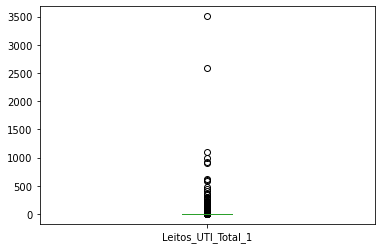

In [68]:
dfLeitos['Leitos_UTI_Total_1'].plot.box()

Tendo em vista a alta granularidade desta tabela (separada por municípios), vamos:
<ul>
    <li>calcular a média da coluna 'Leitos_UTI_Total_1' </li>
    <li>utilizar média + média dos 75% como valor base de leitos de UTI</li>
    <li>somar média + média dos 75%  e, aquilo que estiver muito fora disso será um <i>outlier</i></li>
    <li>utilizar o scatter plot para exibir os dados</li>
</ul> 

In [129]:
desvioPadraoX1 = dfLeitosX1['Leitos_UTI_Total_1'].std()
media_dfLeitosX1 = dfLeitosX1['Leitos_UTI_Total_1'].mean()
varMediaConsiderada = desvioPadraoX1 + media_dfLeitosX1
print("  * desvio padrão Leitos_UTI_Total_1 => ", desvioPadrao)
print("  * média Leitos_UTI_Total_1 => ", media_dfLeitosX1)
print("  * varMediaConsiderada => ", varMediaConsiderada)



  * desvio padrão Leitos_UTI_Total_1 =>  68.94438030829726
  * média Leitos_UTI_Total_1 =>  59.53917910447761
  * varMediaConsiderada =>  274.6420720113258


In [130]:
dfLeitosX2 = dfLeitos[dfLeitos['Leitos_UTI_Total_1']>0]
dfLeitosX2 = dfLeitosX2[dfLeitosX2['Leitos_UTI_Total_1'] < varMediaConsiderada]
dfLeitosX2['Leitos_UTI_Total_1'].describe()

count    518.000000
mean      32.563707
std       43.374653
min        1.000000
25%       10.000000
50%       16.000000
75%       35.000000
max      274.000000
Name: Leitos_UTI_Total_1, dtype: float64

<IPython.core.display.Javascript object>


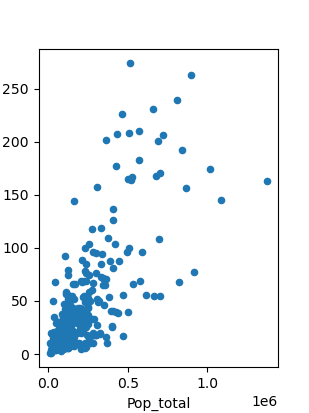

In [154]:
dfLeitosX2.plot.scatter(x='Pop_total', y='Leitos_UTI_Total_1', figsize=(3,4))

Abaixo, utilizando nosso dataframe já normalizado (dfLeitosX2) vamos novamente usar o boxplot, mas agora agrupando pela População Total de cada município:

<IPython.core.display.Javascript object>


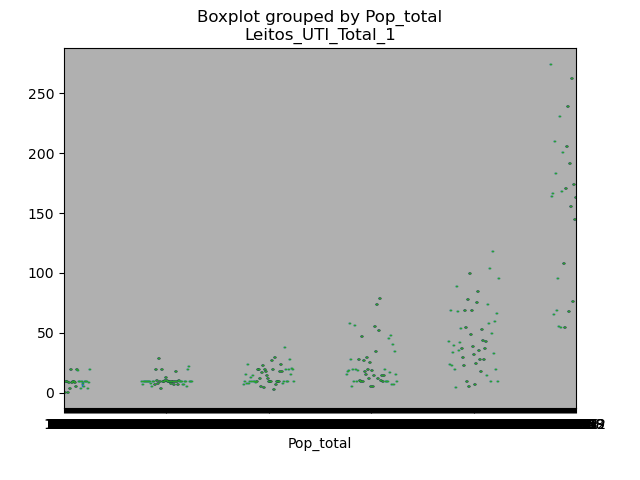

In [151]:
%matplotlib notebook
dfLeitosX2.boxplot(column='Leitos_UTI_Total_1', by='Pop_total')

Utilizando um gráfico de correlação entre as colunas:

<IPython.core.display.Javascript object>


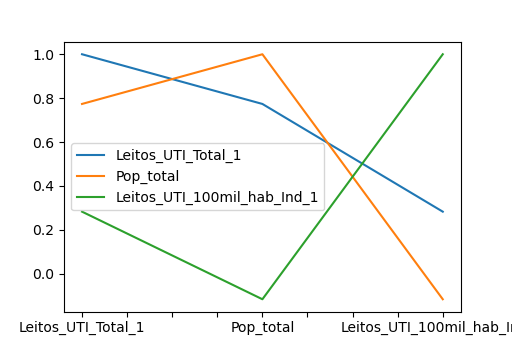

In [153]:
%matplotlib notebook
dfLeitosX2[['Leitos_UTI_Total_1','Pop_total','Leitos_UTI_100mil_hab_Ind_1']].corr().plot()

Nos histogramas abaixo podemos observar que: 
<ol>
    <li>A maior parte das cidades possui de zero a 25 leitos de UTI</li>
    <li>São poucas as cidades com mais de 100 mil habitantes</li>
<ol>

<IPython.core.display.Javascript object>


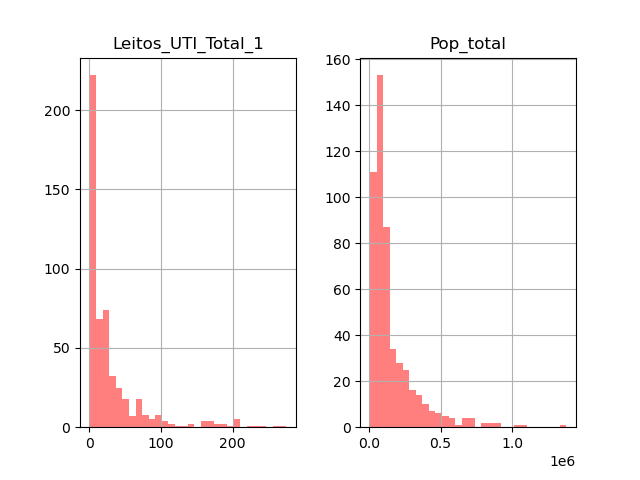

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CD1A069E20>,
      dtype=object)

In [155]:
%matplotlib notebook
dfLeitosX2[['Leitos_UTI_Total_1', 'Pop_total']].hist(bins=30, color='red', alpha=0.5) 
#o parametro alpha (acima) apenas controla opacidade da cor

Abaixo a Regressão Linear com os dados da amostra ("y estimado"):

<IPython.core.display.Javascript object>


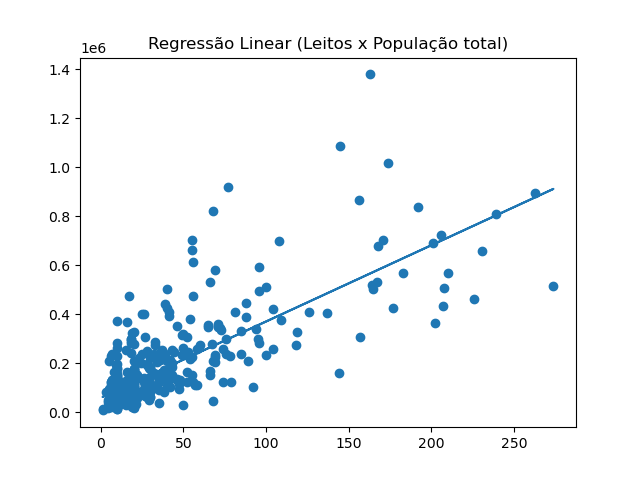

In [156]:
from scipy import stats
x = dfLeitosX2['Leitos_UTI_Total_1']
y = dfLeitosX2['Pop_total']
a, b, r, p, std_err = stats.linregress(x, y)

def estimate_y(x):
  return a * x + b

dfLeitosX2['y_estimated'] = dfLeitosX2['Leitos_UTI_Total_1'].apply(estimate_y)

plt.figure()
plt.title('Regressão Linear (Leitos x População total)')
plt.plot(dfLeitosX2['Leitos_UTI_Total_1'], dfLeitosX2['y_estimated']) #traçando a reta com o y_estimado!!
plt.scatter(dfLeitosX2['Leitos_UTI_Total_1'], dfLeitosX2['Pop_total']) #mantendo o plotbox de todos os pontos
plt.show()

### 3.3 Obtenção do número de respiradores por município
 
 
 
 
### 3.4 Obtenção do número de óbitos por município